In [1]:
%pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customers/BankChurners.csv


In [3]:
df = pd.read_csv('/kaggle/input/credit-card-customers/BankChurners.csv')

In [4]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [5]:
# Tipe data kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [6]:
# Statistik Deskriptif untuk kolom numerik
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


<function matplotlib.pyplot.show(close=None, block=None)>

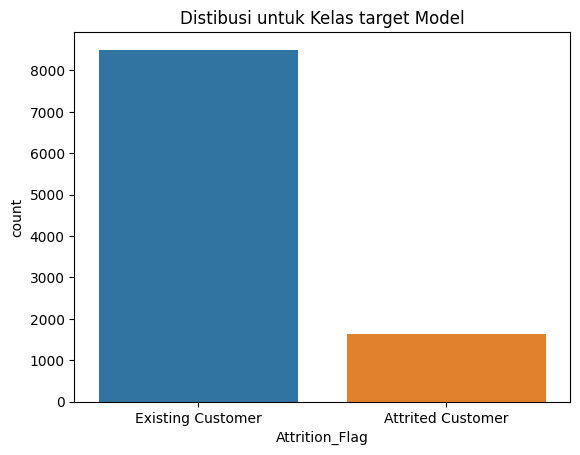

In [7]:
df['Attrition_Flag'].value_counts(normalize=True) * 100
sns.countplot(x='Attrition_Flag', data=df)
plt.title('Distibusi untuk Kelas target Model')
plt.show

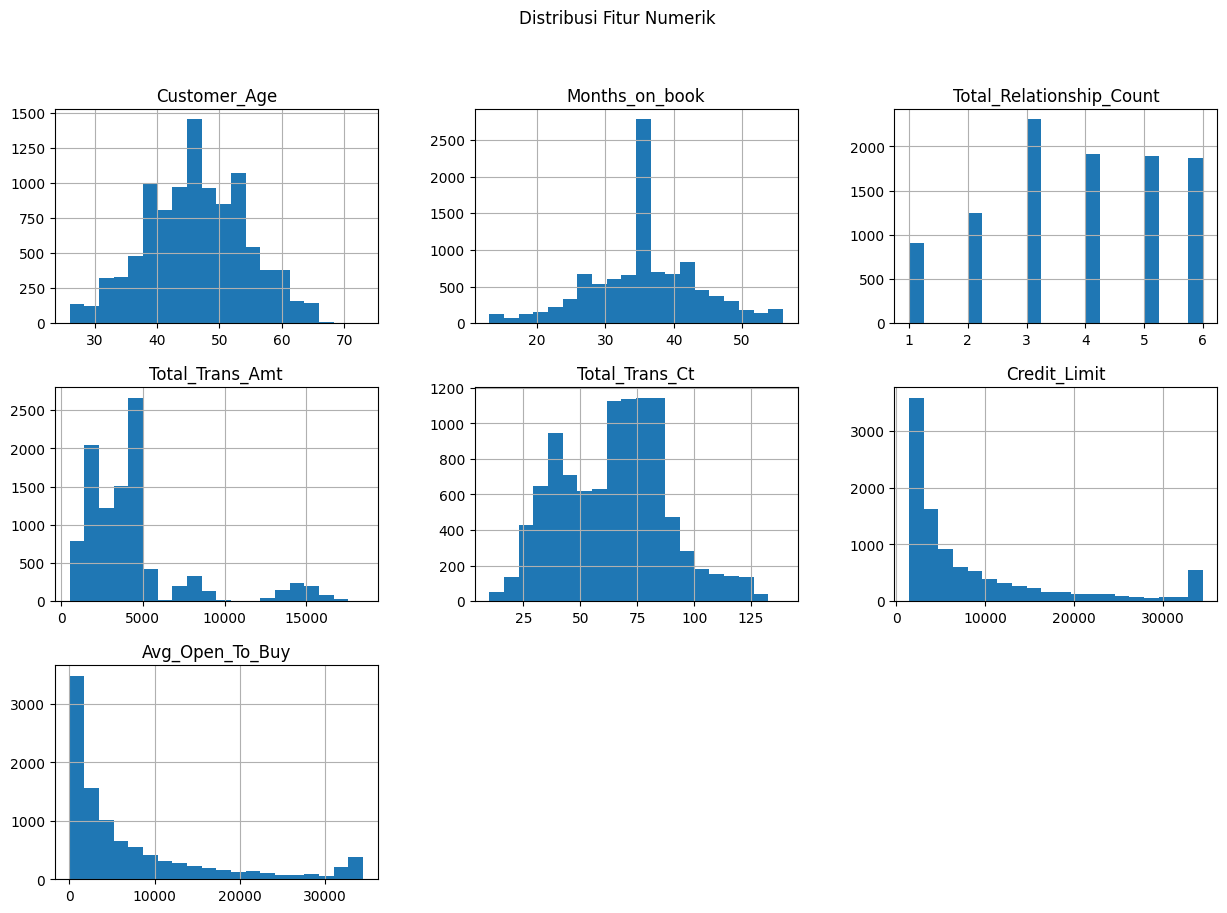

In [8]:
numerical_cols = ['Customer_Age', 'Months_on_book', 'Total_Relationship_Count',
                  'Total_Trans_Amt', 'Total_Trans_Ct', 'Credit_Limit', 'Avg_Open_To_Buy']

df[numerical_cols].hist(bins=20, figsize=(15, 10))
plt.suptitle("Distribusi Fitur Numerik")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

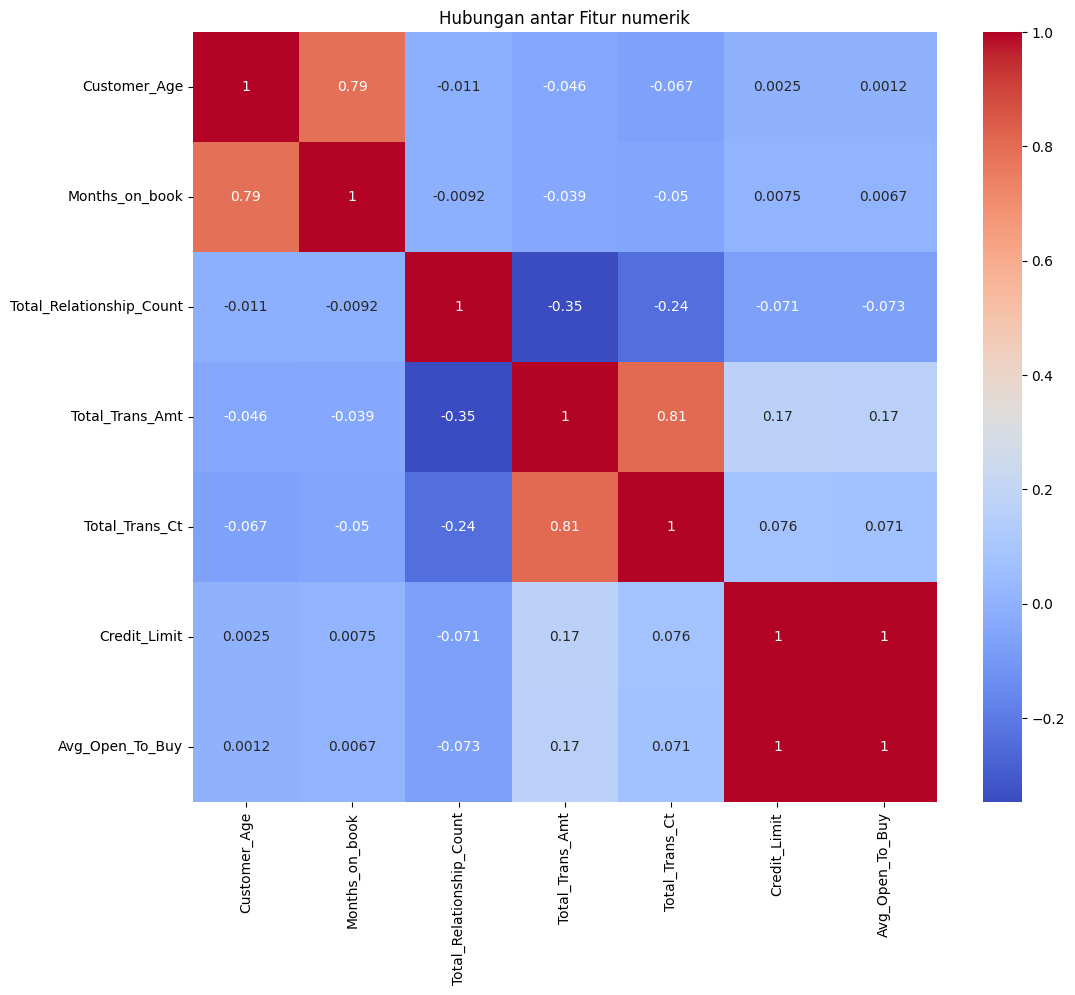

In [9]:
plt.figure(figsize=(12, 10))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Hubungan antar Fitur numerik')
plt.show

<Axes: xlabel='Attrition_Flag', ylabel='Customer_Age'>

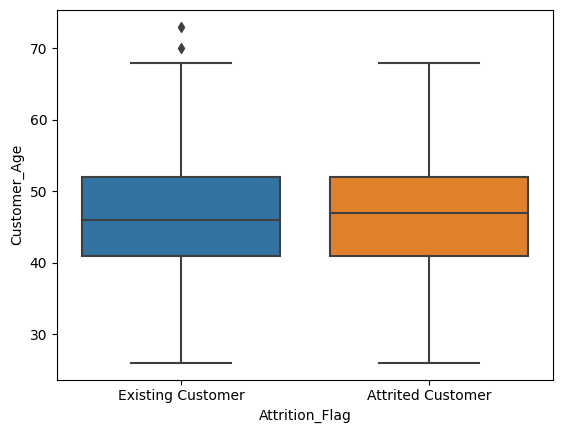

In [10]:
sns.boxplot(x='Attrition_Flag', y='Customer_Age', data=df)

In [11]:
df = df.drop(['CLIENTNUM', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
              'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)

In [12]:
df = df.drop(['Gender'], axis=1)

In [13]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# Pisahkan fitur dan target
X = df.drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag'].apply(lambda x: 1 if x == 'Existing Customer' else 0)

# Tentukan kolom kategorikal yang akan di-encode
categorical_cols = ['Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

# Kolom numerik adalah semua kolom selain yang di-kategorikan
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# Buat ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'  # kolom lainnya tetap dimasukkan
)

# Transformasi fit & transform ke X
X_encoded = preprocessor.fit_transform(X)

# Ambil nama-nama fitur hasil OneHotEncoding
ohe = preprocessor.named_transformers_['cat']
encoded_feature_names = ohe.get_feature_names_out(categorical_cols)

# Gabungkan dengan kolom numerik
all_feature_names = list(encoded_feature_names) + numeric_cols

# Buat DataFrame akhir
X_encoded_df = pd.DataFrame(X_encoded, columns=all_feature_names)


# Cek bentuk akhir
print("Shape fitur setelah encoding:", X_encoded_df.shape)
X_encoded_df.head()


Shape fitur setelah encoding: (10127, 35)


,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,3.0,12691.0,777.0,11914.0,1.335,1144.0,42.0,1.625,0.061
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,2.0,8256.0,864.0,7392.0,1.541,1291.0,33.0,3.714,0.105
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3418.0,0.0,3418.0,2.594,1887.0,20.0,2.333,0.000
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,1.0,3313.0,2517.0,796.0,1.405,1171.0,20.0,2.333,0.760
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,4716.0,0.0,4716.0,2.175,816.0,28.0,2.500,0.000


In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X_encoded_df)

X_scaled_df = pd.DataFrame(X_scaled, columns=all_feature_names)

**Split Data**

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y, test_size=0.2, random_state=42, stratify=y
)

# **1. Model Menggunakan Logistic Regression**

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Inisialisasi model
model = LogisticRegression(max_iter=1000)

# Latih model
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8998025666337611

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.56      0.64       325
           1       0.92      0.96      0.94      1701

    accuracy                           0.90      2026
   macro avg       0.84      0.76      0.79      2026
weighted avg       0.89      0.90      0.89      2026



**Model berhasil memprediksi dengan Akurasi 90% pelanggan benar secara garis besar. (Sebelum SMOTE)**
* Tingkat presisi pada kelas 0 adalah 0.75, Banyak pelanggan yang benar-benar keluar (0) tapi tidak terdeteksi (recall rendah = 56%) model kurang sensitif terhadap kelas ini.
* Tingkat Presisi pada kelas 1 adalah 0.92, Model sangat baik dalam mendeteksi pelanggan yang masih aktif

# SMOTE (Synthetic Minority Over-sampling Technique) Guna membantu mengurangi risiko overfitting dibandingkan hanya meng-copy data minoritas atau oversampling biasa

In [17]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Cek distribusi kelas sebelum SMOTE
print("Sebelum SMOTE:", Counter(y_train))

# Inisialisasi SMOTE
smote = SMOTE(random_state=42)

# Terapkan SMOTE hanya pada data training
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Cek distribusi kelas setelah SMOTE
print("Setelah SMOTE:", Counter(y_train_smote))


Sebelum SMOTE: Counter({1: 6799, 0: 1302})
Setelah SMOTE: Counter({0: 6799, 1: 6799})


In [18]:
model_smote = LogisticRegression(max_iter=1000, random_state=42)

model_smote.fit(X_train_smote, y_train_smote) # melatih model yang sudah di SMOTE

y_pred_smote = model_smote.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_smote))
print("\nClassification Report:\n", classification_report(y_test, y_pred_smote))

Accuracy: 0.8529121421520237

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.82      0.64       325
           1       0.96      0.86      0.91      1701

    accuracy                           0.85      2026
   macro avg       0.74      0.84      0.78      2026
weighted avg       0.89      0.85      0.86      2026



**Model setelah SMOTE**
* Terlihat akurasi menurun menjadi 85%
* Namun model menjadi lebih sensitif mendeteksi kelas 0 dengan recall 0.82
* di satu sisi model sekarang sering “false alarm” lebih banyak (precision turun)
* Akurasi menjadi turun karena model “mengorbankan” prediksi kelas mayoritas sedikit demi mendapatkan lebih banyak deteksi kelas minoritas

> Dalam konteks ini, mendeteksi pelanggan yang akan keluar lebih penting daripada memprediksi pelanggan yang tetap aktif

# Uji coba mengubah THRESHOLD
*untuk menyeimbangkan precision dan recall*

In [19]:
from sklearn.metrics import classification_report, accuracy_score

y_probs = model_smote.predict_proba(X_test)[:, 1]

threshold = 0.3 # Tentukan threshold baru

# Buat prediksi dengan threshold custom
y_pred_custom = np.where(y_probs >= threshold, 1, 0)

print(f"Accuracy (threshold={threshold}):", accuracy_score(y_test, y_pred_custom))
print("\nClassification Report (threshold={threshold}):\n", classification_report(y_test, y_pred_custom))


Accuracy (threshold=0.3): 0.8869693978282329

Classification Report (threshold={threshold}):
               precision    recall  f1-score   support

           0       0.63      0.71      0.67       325
           1       0.94      0.92      0.93      1701

    accuracy                           0.89      2026
   macro avg       0.79      0.82      0.80      2026
weighted avg       0.89      0.89      0.89      2026



**Model setelah *SMOTE* dan perubahan *THRESHOLD***
* Akurasi menjadi naik menjadi 89%
* Recall kelas 0 turun dari 0.82 ke 0.71, tapi precision naik dari 0.53 ke 0.63
* Recall kelas 1 juga meningkat jadi 0.92, precision tetap tinggi 0.94
* F1-score kelas 0 naik dari 0.64 (SMOTE default) ke 0.67
* F1-score keseluruhan juga membaik

# **Visualisasi Precision-Recall curve**

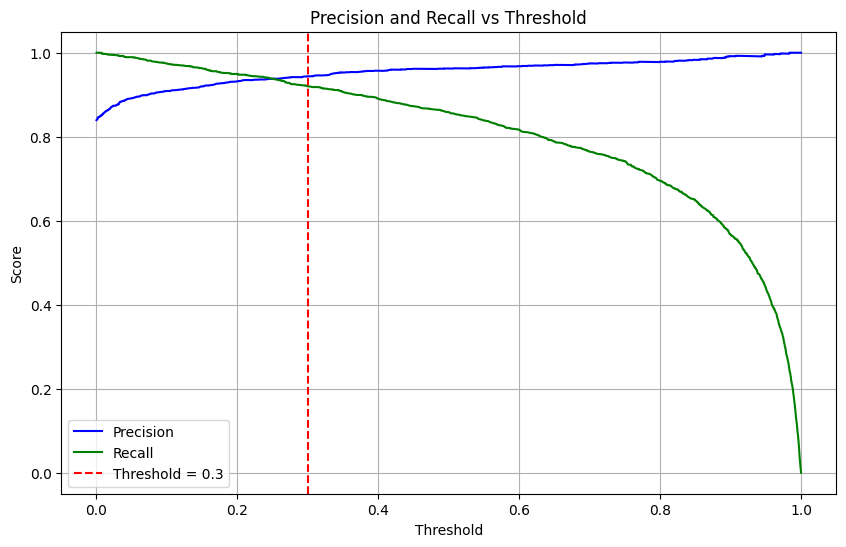

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Dapatkan probabilitas prediksi kelas 1
y_probs = model_smote.predict_proba(X_test)[:, 1]

# Hitung precision, recall, dan threshold untuk setiap titik
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

# Plot Precision-Recall vs Threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions[:-1], label="Precision", color='b')
plt.plot(thresholds, recalls[:-1], label="Recall", color='g')
plt.axvline(x=0.3, color='r', linestyle='--', label='Threshold = 0.3')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision and Recall vs Threshold")
plt.legend()
plt.grid(True)
plt.show()


# **Visualisasi ROC Curve**

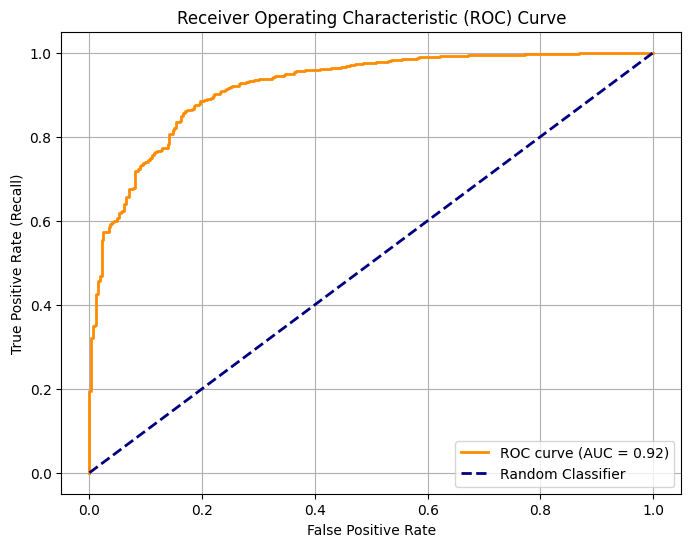

In [21]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_probs = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr) # ROC Curve

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()


# **Visualisasi Confusion Matrix untuk Threshold 0.3**

<Figure size 600x500 with 0 Axes>

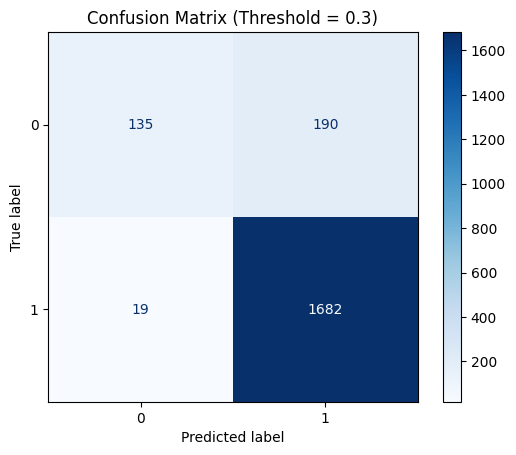

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Ubah threshold
threshold = 0.3
y_pred_custom = (y_probs >= threshold).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_custom)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

plt.figure(figsize=(6, 5))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title(f'Confusion Matrix (Threshold = {threshold})')
plt.grid(False)
plt.show()


# **2. Model Menggunakan Random Forest Classifier**

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train) # Inisialisasi model

rf_pred = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Classification Report (Random Forest):\n", classification_report(y_test, rf_pred))


Random Forest Accuracy: 0.9545903257650543
Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.92      0.78      0.85       325
           1       0.96      0.99      0.97      1701

    accuracy                           0.95      2026
   macro avg       0.94      0.88      0.91      2026
weighted avg       0.95      0.95      0.95      2026



**Hasil model menggunkan *Random Forest Classifier***
* Akurasi diangka 95.45% meningkat sangat drastis dibandingkan *Logistic Regression*
* F1-score untuk kelas 0 adalah 0.85 ini sangat baik kaena biasanya diabaikan oleh model
* Kelas 1 (mayoritas) diprediksi sangat baik, hampir sempurna.
* Kelas 0 (minoritas) masih cukup kuat, tapi recall 0.78 artinya model masih miss sekitar 22% customer churn.
* Precision kelas 0 tinggi sedikit false positive.
* Recall kelas 0 agak lemah  masih ada pelanggan churn yang tidak terdeteksi.

# **Visualiasasi untuk melihat Fitur paling berpengaruh**

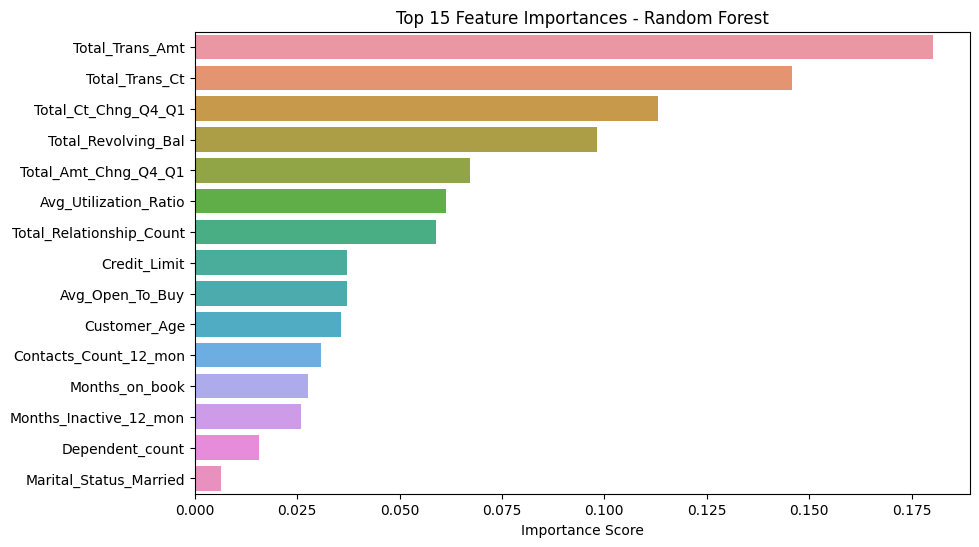

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ambil fitur penting
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Urutkan dan visualisasi
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp[:15], y=feat_imp.index[:15])
plt.title("Top 15 Feature Importances - Random Forest")
plt.xlabel("Importance Score")
plt.show()

# **Tuning HyperParameter untuk Model Random Forest Classifier**

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid untuk tuning hyperparameter
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Grid search dengan F1-macro sebagai scoring
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='f1_macro',
    cv=3,
    n_jobs=-1,
    verbose=1
)

# Fit ke data training
grid_search.fit(X_train, y_train)

# Simpan model terbaik
best_rf = grid_search.best_estimator_
best_params = grid_search.best_params_

best_params


Fitting 3 folds for each of 24 candidates, totalling 72 fits


{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 200}

In [26]:
y_pred_rf = best_rf.predict(X_test)

# Evaluasi
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Accuracy: 0.9536031589338598

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.78      0.84       325
           1       0.96      0.99      0.97      1701

    accuracy                           0.95      2026
   macro avg       0.94      0.89      0.91      2026
weighted avg       0.95      0.95      0.95      2026


Confusion Matrix:
 [[ 255   70]
 [  24 1677]]


**Hasil Model setelah Tuning HyperParameter**
* Akurasi tetap sangat tinggi model setelah HyperParameter memprediksi benar untuk data uji
* Kelas minoritas (0) masih cukup sulit diprediksi meskipun lebih baik dari Logistic Regression
* Recall 78% untuk kelas 0 artinya model berhasil menangkap sebagian besar pelanggan yang keluar, namun ada ruang untuk perbaikan.
* Kelas mayoritas (1) memiliki performa sangat tinggi.

# **Visualiasasi untuk melihat Fitur paling berpengaruh setelah Tuning HyperParameter**

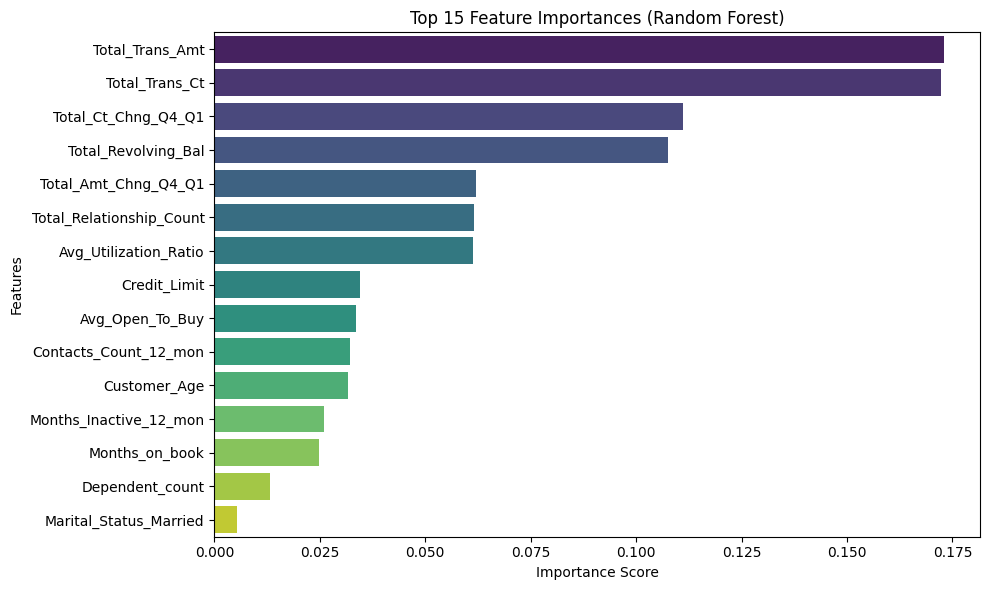

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ambil feature importances dari model terbaik hasil tuning
importances = best_rf.feature_importances_

# Ambil nama fitur dari one-hot encoder + fitur numerik
feature_names = X_train.columns

# Buat dataframe untuk visualisasi
feat_importances = pd.Series(importances, index=feature_names)
feat_importances = feat_importances.sort_values(ascending=False).head(15)  # Top 15 fitur

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_importances.values, y=feat_importances.index, palette="viridis")
plt.title("Top 15 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


# **Deployment**

In [30]:
import joblib

# Simpan model
joblib.dump(best_rf, 'model.pkl')

# Load model dari file
loaded_model = joblib.load('model.pkl')

joblib.dump(scaler, 'scalerr.pkl')

['scalerr.pkl']